In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
dataframe = pd.read_csv('data.csv',header=0)

In [4]:
dataframe.head()

,Unnamed: 0,Date,Demand
0,96,1964-01,106.1
1,97,1964-02,102.1
2,98,1964-03,105.2
3,99,1964-04,101.0
4,100,1964-05,84.3


In [5]:
dataframe.columns

Index(['Unnamed: 0', 'Date', 'Demand'], dtype='object')

In [6]:
dataframe.drop('Unnamed: 0',
  axis='columns', inplace=True)

In [7]:
dataframe.shape

(121, 2)

In [8]:
dataframe['Date'].dtype

dtype('O')

In [9]:
dataframe["Date"]= pd.to_datetime(dataframe["Date"])


In [10]:
dataframe['Date'].dtype

dtype('<M8[ns]')

In [11]:
dataframe.describe()

,Date,Demand
count,121,121.000000
mean,1968-12-30 23:24:17.851239668,125.844628
min,1964-01-01 00:00:00,84.300000
25%,1966-07-01 00:00:00,107.100000
50%,1969-01-01 00:00:00,123.700000
75%,1971-07-01 00:00:00,138.400000
max,1974-01-01 00:00:00,197.000000
std,NaN,23.407392


In [12]:
dataframe['year'] = dataframe['Date'].dt.year

In [13]:
dataframe['month'] = dataframe['Date'].dt.month

In [14]:
dataframe.head(5)

,Date,Demand,year,month
0,1964-01-01,106.1,1964,1
1,1964-02-01,102.1,1964,2
2,1964-03-01,105.2,1964,3
3,1964-04-01,101.0,1964,4
4,1964-05-01,84.3,1964,5


In [15]:
dataframe.index = dataframe['Date'] 

In [16]:
demand = dataframe['Demand']


In [17]:
dataframe

,Date,Demand,year,month
Date,,,,
1964-01-01,1964-01-01,106.1,1964,1
1964-02-01,1964-02-01,102.1,1964,2
1964-03-01,1964-03-01,105.2,1964,3
1964-04-01,1964-04-01,101.0,1964,4
1964-05-01,1964-05-01,84.3,1964,5
...,...,...,...,...
1973-09-01,1973-09-01,129.4,1973,9
1973-10-01,1973-10-01,174.1,1973,10
1973-11-01,1973-11-01,197.0,1973,11


In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [19]:
import matplotlib.pylab as plt
%matplotlib inline

<Axes: xlabel='Date'>

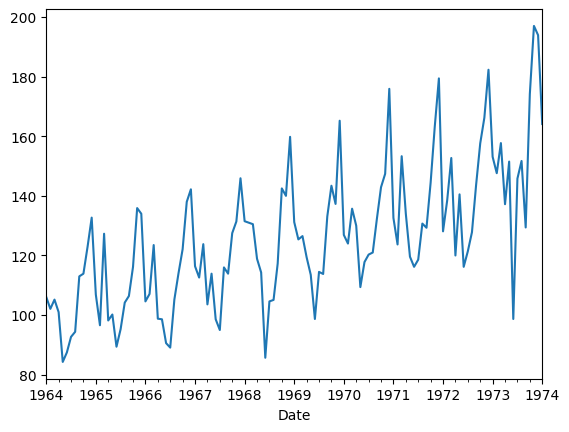

In [20]:
dataframe['Demand'].plot()

In [21]:
year1 = dataframe[(dataframe['Date'] > '1964-01-01') & (dataframe['Date'] <= '1968-01-1')].copy()

<Axes: xlabel='Date'>

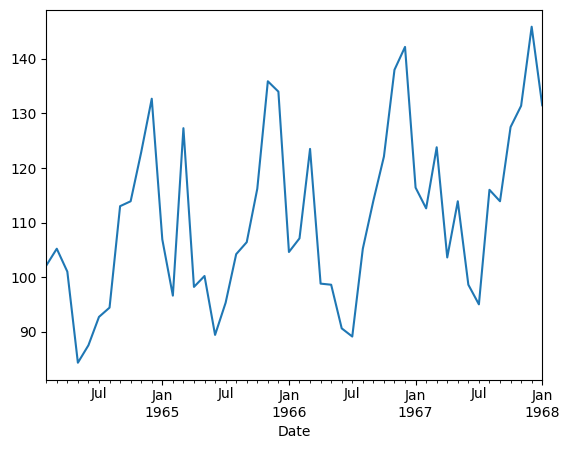

In [22]:
year1['Demand'].plot()

In [24]:
decomposition = seasonal_decompose(demand,period=1)


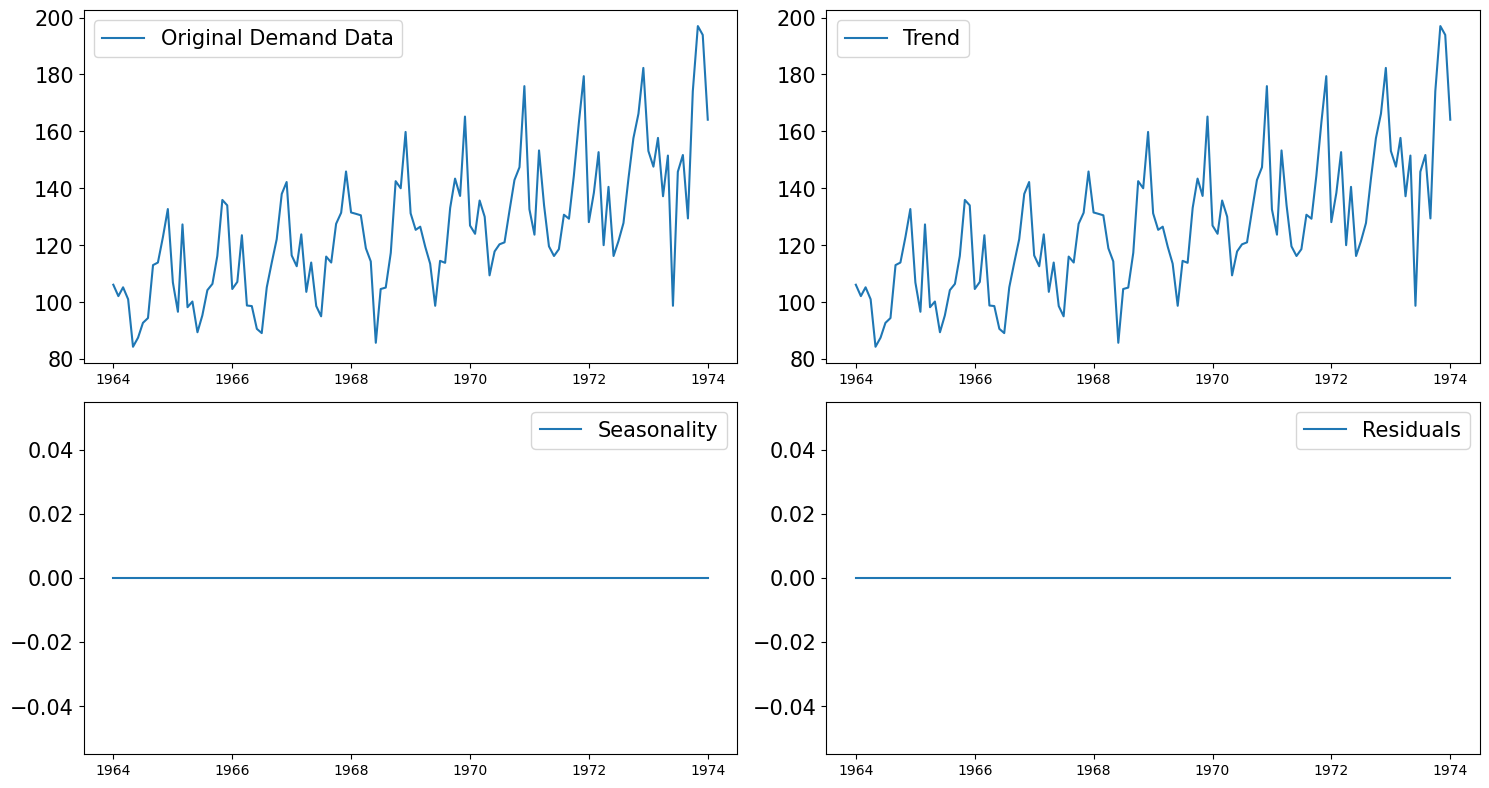

In [25]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(15, 8))

plt.subplot(2,2,1)
plt.plot(demand, label='Original Demand Data')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,2)
plt.plot(trend, label='Trend')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,3)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,4)
plt.plot(residual, label='Residuals')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.tight_layout()

In [26]:
from statsmodels.tsa.stattools import adfuller

In [27]:
x = dataframe['Demand'].values

In [28]:
result = adfuller(x)

In [29]:
print("ADF statistics: %f" % result[0])
print("p-value: %f" % result[1])
print('Critical Values:')
for key,value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print('Time series is stationary')
else:
    print('Time series is not stationary')

ADF statistics: 1.990182
p-value: 0.998660
Critical Values:
	1%: -3.493
	5%: -2.889
	10%: -2.581
Time series is not stationary


In [30]:
decomposition2 = seasonal_decompose(demand,model = 'multiplicative',period= 12)


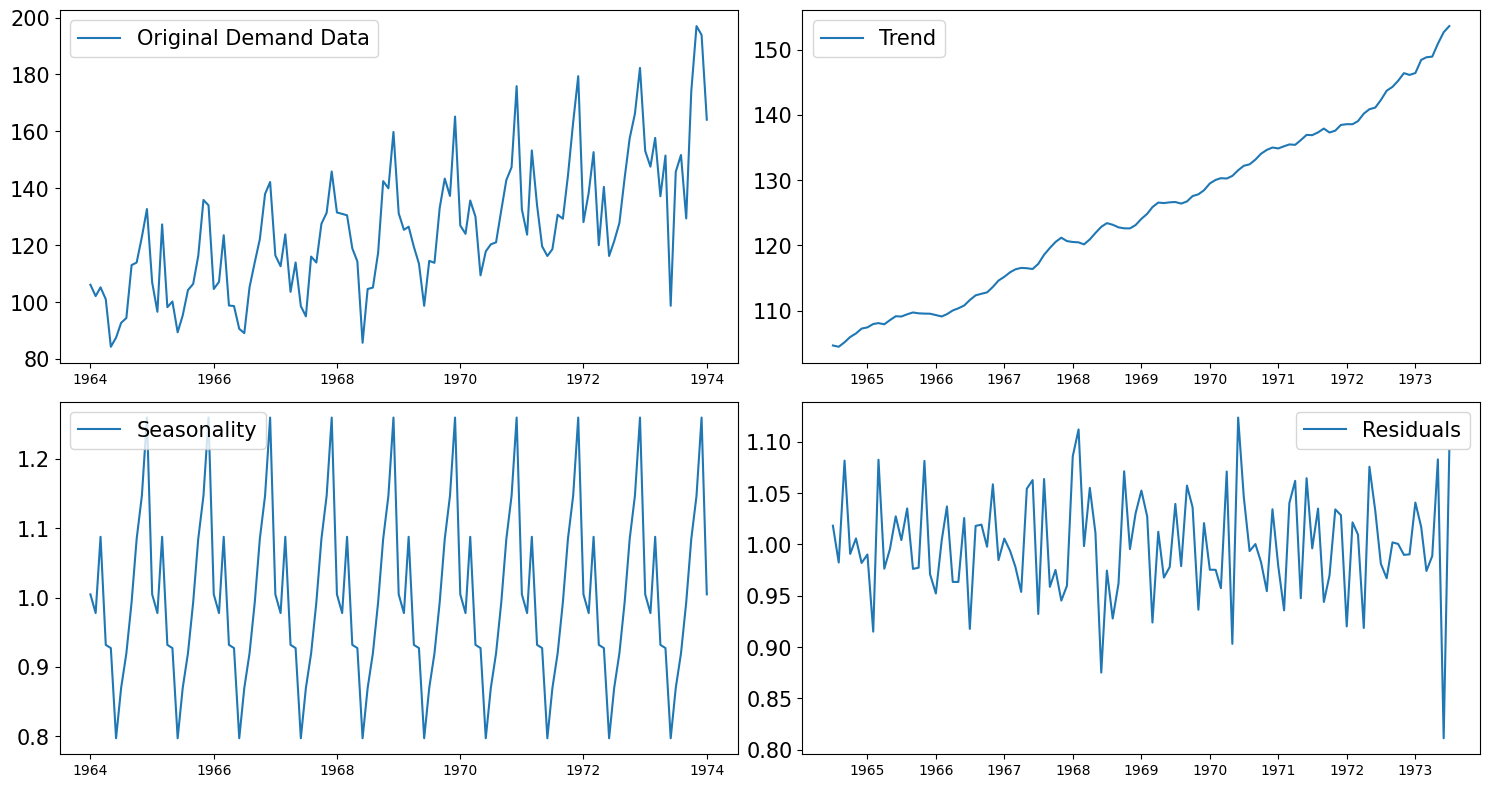

In [31]:
trend = decomposition2.trend
seasonal = decomposition2.seasonal
residual = decomposition2.resid

plt.figure(figsize=(15, 8))

plt.subplot(2,2,1)
plt.plot(demand, label='Original Demand Data')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,2)
plt.plot(trend, label='Trend')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,3)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,4)
plt.plot(residual, label='Residuals')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.tight_layout()

In [32]:
decomposition3 = seasonal_decompose(demand,model = 'additive',period= 1)


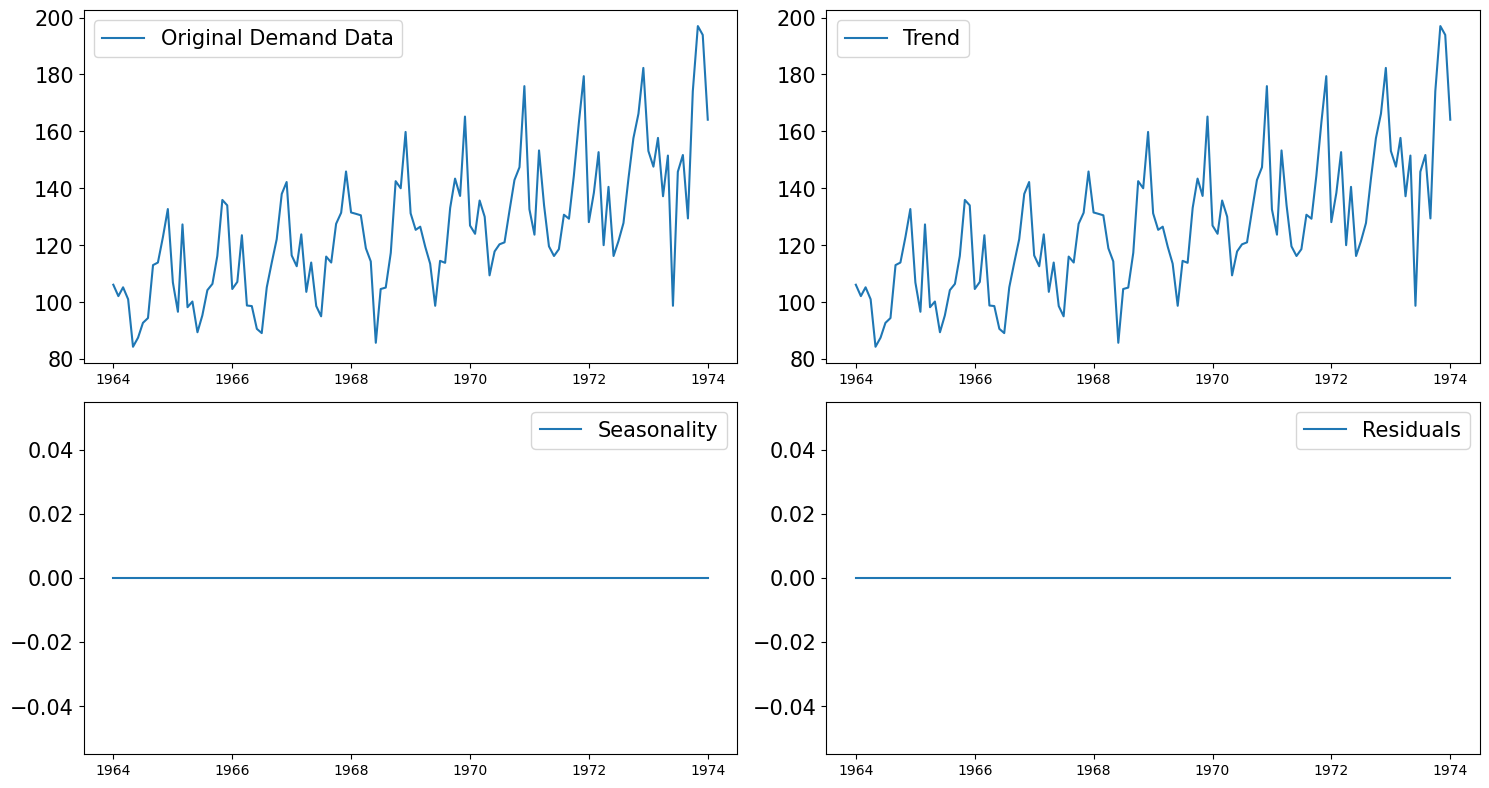

In [33]:
trend = decomposition3.trend
seasonal = decomposition3.seasonal
residual = decomposition3.resid

plt.figure(figsize=(15, 8))

plt.subplot(2,2,1)
plt.plot(demand, label='Original Demand Data')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,2)
plt.plot(trend, label='Trend')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,3)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,4)
plt.plot(residual, label='Residuals')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.tight_layout()

In [34]:
dataframe['Demand_diff'] = dataframe['Demand'] - dataframe['Demand'].shift(1) 

<Axes: xlabel='Date'>

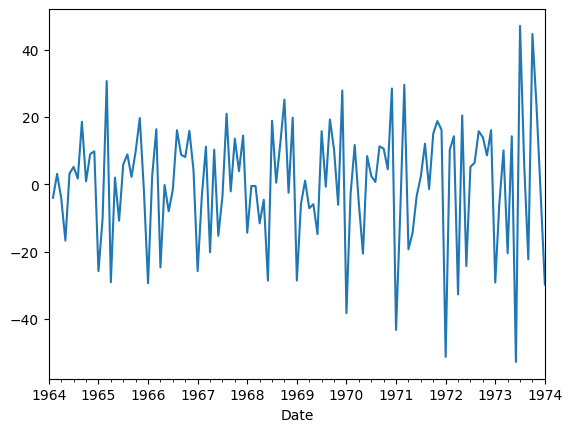

In [35]:
dataframe['Demand_diff'].plot()

In [36]:
dataframe.dropna(inplace = True)

In [37]:
dataframe

,Date,Demand,year,month,Demand_diff
Date,,,,,
1964-02-01,1964-02-01,102.1,1964,2,-4.0
1964-03-01,1964-03-01,105.2,1964,3,3.1
1964-04-01,1964-04-01,101.0,1964,4,-4.2
1964-05-01,1964-05-01,84.3,1964,5,-16.7
1964-06-01,1964-06-01,87.5,1964,6,3.2
...,...,...,...,...,...
1973-09-01,1973-09-01,129.4,1973,9,-22.3
1973-10-01,1973-10-01,174.1,1973,10,44.7
1973-11-01,1973-11-01,197.0,1973,11,22.9


In [38]:
dataframe['Demand_diff']

Date
1964-02-01    -4.0
1964-03-01     3.1
1964-04-01    -4.2
1964-05-01   -16.7
1964-06-01     3.2
              ... 
1973-09-01   -22.3
1973-10-01    44.7
1973-11-01    22.9
1973-12-01    -3.1
1974-01-01   -29.8
Name: Demand_diff, Length: 120, dtype: float64

In [39]:
y = dataframe['Demand_diff'].values

In [40]:
result = adfuller(y)

In [41]:
print("ADF statistics: %f" % result[0])
print("p-value: %f" % result[1])
print('Critical Values:')
for key,value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print('Time series is stationary')
else:
    print('Time series is not stationary')

ADF statistics: -4.599136
p-value: 0.000130
Critical Values:
	1%: -3.494
	5%: -2.889
	10%: -2.582
Time series is stationary


In [42]:
rollmean = dataframe["Demand_diff"].rolling(12).mean()
rollstd = dataframe["Demand_diff"].rolling(12).std()



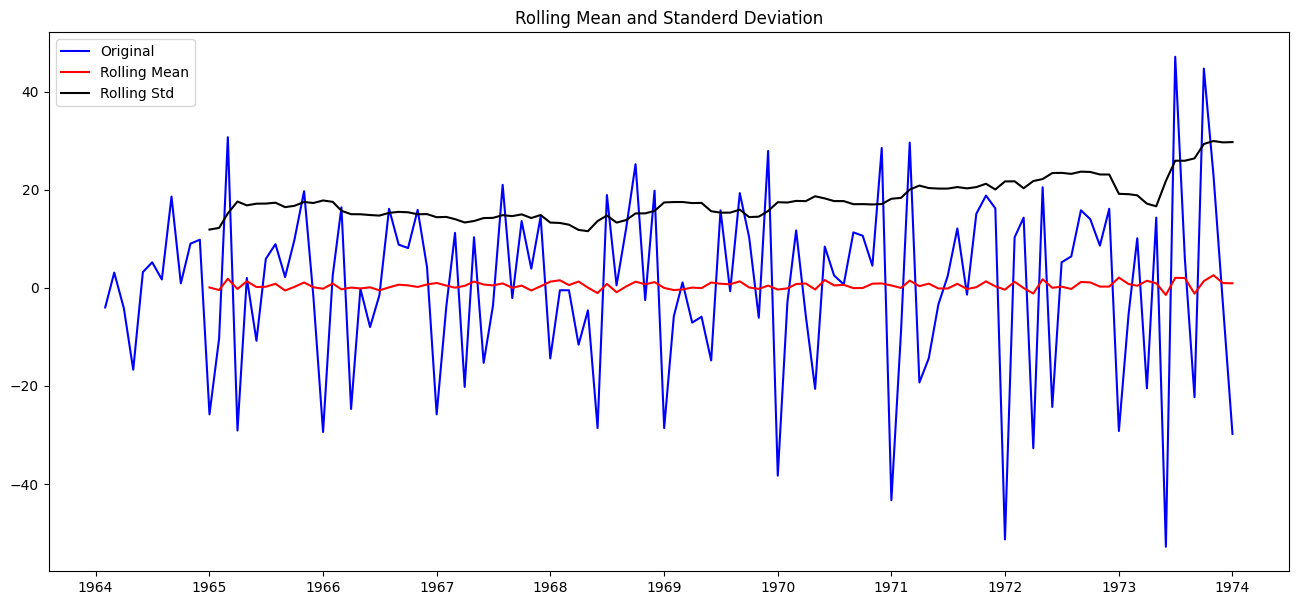

In [43]:
plt.figure(figsize=(16,7))

original = plt.plot(dataframe['Demand_diff'],color='blue',label='Original')
mean = plt.plot(rollmean,color='red',label='Rolling Mean')
std = plt.plot(rollstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standerd Deviation')
plt.show(block=False)


In [44]:
t1 = dataframe['Demand_diff']

In [45]:
t1

Date
1964-02-01    -4.0
1964-03-01     3.1
1964-04-01    -4.2
1964-05-01   -16.7
1964-06-01     3.2
              ... 
1973-09-01   -22.3
1973-10-01    44.7
1973-11-01    22.9
1973-12-01    -3.1
1974-01-01   -29.8
Name: Demand_diff, Length: 120, dtype: float64

In [46]:
test = dataframe['Demand_diff'].tail(12)

In [47]:
test

Date
1973-02-01    -5.5
1973-03-01    10.1
1973-04-01   -20.5
1973-05-01    14.3
1973-06-01   -52.8
1973-07-01    47.1
1973-08-01     5.9
1973-09-01   -22.3
1973-10-01    44.7
1973-11-01    22.9
1973-12-01    -3.1
1974-01-01   -29.8
Name: Demand_diff, dtype: float64

In [48]:
train = dataframe['Demand_diff'].head(108)

In [49]:
train

Date
1964-02-01    -4.0
1964-03-01     3.1
1964-04-01    -4.2
1964-05-01   -16.7
1964-06-01     3.2
              ... 
1972-09-01    15.8
1972-10-01    14.0
1972-11-01     8.6
1972-12-01    16.1
1973-01-01   -29.2
Name: Demand_diff, Length: 108, dtype: float64

In [52]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [53]:
model2 = auto_arima(dataframe['Demand'],trace = True, suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1029.553, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1022.520, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1020.272, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1027.653, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1019.290, Time=0.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1017.967, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1021.195, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1019.959, Time=0.37 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1022.063, Time=0.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 s

In [54]:
import statsmodels.api as sm


In [55]:
model2 = sm.tsa.statespace.SARIMAX(dataframe['Demand'],order=(1, 1, 1),seasonal_order=(0, 0, 0,12),trace = True, suppress_warnings=True)
model2 = model2.fit()


In [56]:
pred = model2.get_prediction(start = pd.to_datetime('1973-02-01'),end = pd.to_datetime('1974-01-01'),dynamic =True )
pred_ci = pred.conf_int()
pred_ci.head(10)

,lower Demand,upper Demand
1973-02-01,116.583499,180.012925
1973-03-01,109.132594,182.576006
1973-04-01,106.042181,183.178719
1973-05-01,104.511184,183.443580
1973-06-01,103.635962,183.674390
1973-07-01,103.061853,183.920521
1973-08-01,102.633371,184.182075
1973-09-01,102.277684,184.452803
1973-10-01,101.959350,184.727897
1973-11-01,101.660759,185.004480


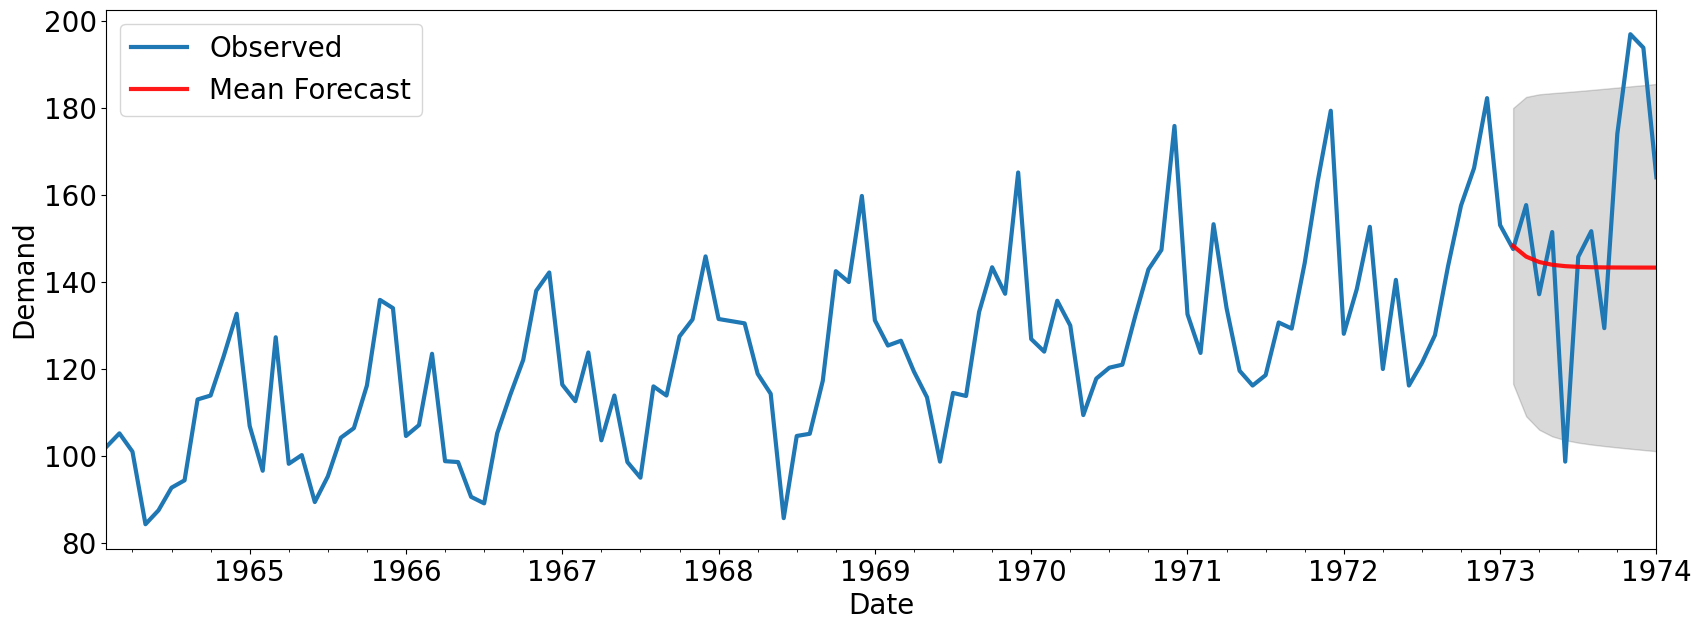

In [57]:
ax = dataframe['Demand'].plot(label='Observed', linewidth = 3, figsize=(20, 7))
pred.predicted_mean.plot(ax=ax, label='Mean Forecast', linewidth = 3, alpha=0.9, color = 'r')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=0.15)

ax.set_xlabel('Date', fontsize = 20)
ax.set_ylabel('Demand', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('forecast1.png',  dpi = 300)
plt.show()

In [58]:
testing = dataframe.tail(12)

In [59]:
import itertools


In [60]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
m = 12
seasonal_pdq = [(x[0], x[1], x[2], m) for x in list(itertools.product(p, d, q))]

In [62]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [63]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [64]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(dataframe['Demand'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{};  AIC:{:.4f}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12);  AIC:1495.1378
ARIMA(0, 0, 0)x(0, 0, 1, 12);  AIC:1352.1662
ARIMA(0, 0, 0)x(0, 1, 0, 12);  AIC:809.4882
ARIMA(0, 0, 0)x(0, 1, 1, 12);  AIC:720.8610
ARIMA(0, 0, 0)x(1, 0, 0, 12);  AIC:784.1767
ARIMA(0, 0, 0)x(1, 0, 1, 12);  AIC:765.8916
ARIMA(0, 0, 0)x(1, 1, 0, 12);  AIC:728.0500
ARIMA(0, 0, 0)x(1, 1, 1, 12);  AIC:722.3273
ARIMA(0, 0, 1)x(0, 0, 0, 12);  AIC:1341.3466
ARIMA(0, 0, 1)x(0, 0, 1, 12);  AIC:1212.4134
ARIMA(0, 0, 1)x(0, 1, 0, 12);  AIC:796.0566
ARIMA(0, 0, 1)x(0, 1, 1, 12);  AIC:710.9733
ARIMA(0, 0, 1)x(1, 0, 0, 12);  AIC:783.6438
ARIMA(0, 0, 1)x(1, 0, 1, 12);  AIC:753.5772
ARIMA(0, 0, 1)x(1, 1, 0, 12);  AIC:725.7049
ARIMA(0, 0, 1)x(1, 1, 1, 12);  AIC:712.6744
ARIMA(0, 1, 0)x(0, 0, 0, 12);  AIC:1020.0003
ARIMA(0, 1, 0)x(0, 0, 1, 12);  AIC:875.3702
ARIMA(0, 1, 0)x(0, 1, 0, 12);  AIC:848.1346
ARIMA(0, 1, 0)x(0, 1, 1, 12);  AIC:752.2166
ARIMA(0, 1, 0)x(1, 0, 0, 12);  AIC:855.5630
ARIMA(0, 1, 0)x(1, 0, 1, 12);  AIC:845.7757
ARIMA(0, 1, 0)x(1, 1, 0, 12

In [65]:
mod = sm.tsa.statespace.SARIMAX(dataframe['Demand'],
                                            order=(1, 1, 1),
                                            seasonal_order=(0, 1, 1, 12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
results = mod.fit()

In [66]:
pred = results.get_prediction(start = pd.to_datetime('1973-01-01'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head(10)

,lower Demand,upper Demand
1973-01-01,123.104225,156.911841
1973-02-01,122.631898,156.439392
1973-03-01,140.420300,174.227188
1973-04-01,119.948057,153.754715
1973-05-01,121.262607,155.069069
1973-06-01,106.868072,140.674369
1973-07-01,117.794988,151.601147
1973-08-01,117.361411,151.167452
1973-09-01,129.233654,163.039596
1973-10-01,147.869951,181.675808


In [67]:
pred.predicted_mean

1973-01-01    140.008033
1973-02-01    139.535645
1973-03-01    157.323744
1973-04-01    136.851386
1973-05-01    138.165838
1973-06-01    123.771220
1973-07-01    134.698068
1973-08-01    134.264432
1973-09-01    146.136625
1973-10-01    164.772880
1973-11-01    168.432850
1973-12-01    186.574319
1974-01-01    154.536555
Freq: MS, Name: predicted_mean, dtype: float64

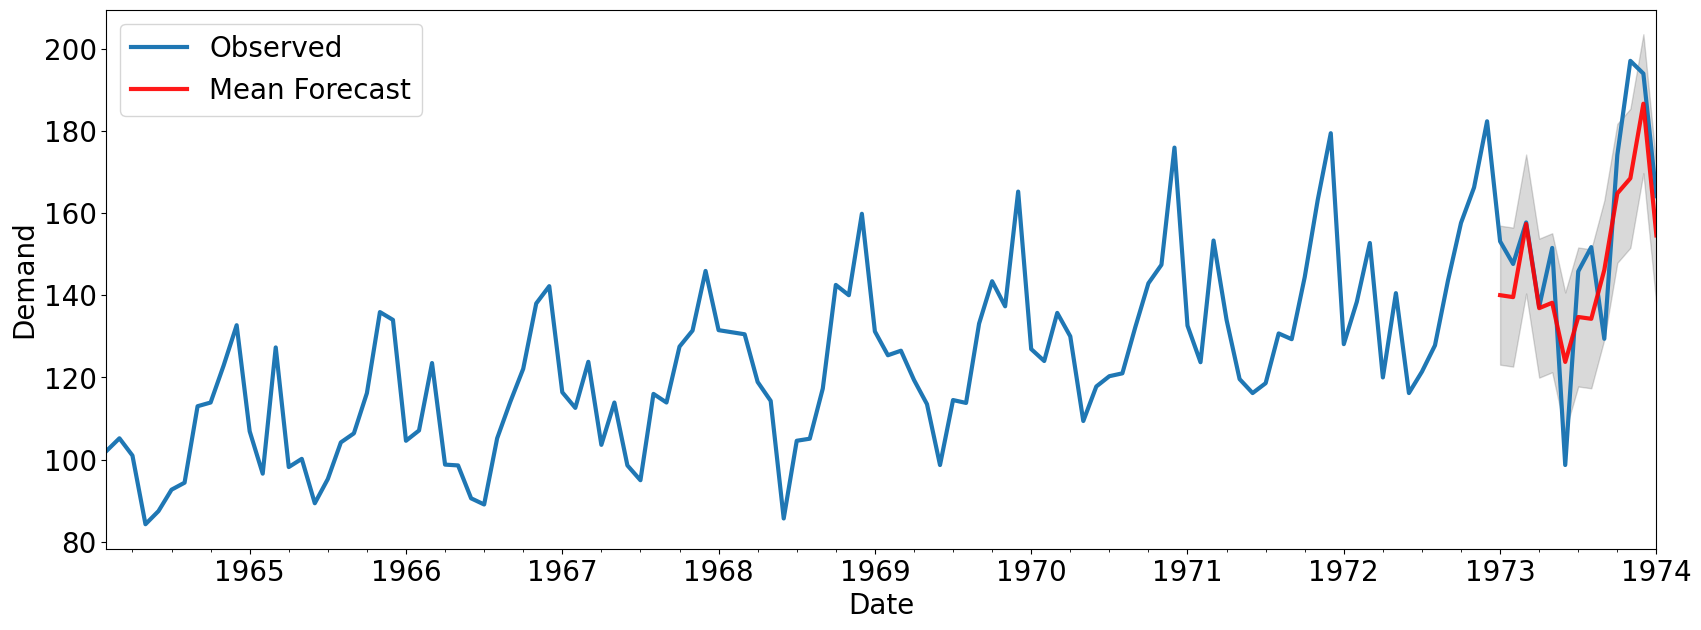

In [68]:
ax = dataframe['Demand'].plot(label='Observed', linewidth = 3, figsize=(20, 7))
pred.predicted_mean.plot(ax=ax, label='Mean Forecast', linewidth = 3, alpha=0.9, color = 'r')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=0.15)

ax.set_xlabel('Date', fontsize = 20)
ax.set_ylabel('Demand', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 20)
ax.tick_params(axis='both', labelsize=20)
plt.savefig('forecast1.png',  dpi = 300)
plt.show()

In [69]:
forcast_uc = results.get_forecast(steps=12)
forcast_ci = forcast_uc.conf_int()
forcast_ci.head(10)


,lower Demand,upper Demand
1974-02-01,135.349742,169.155376
1974-03-01,150.690508,184.703022
1974-04-01,129.077104,163.264173
1974-05-01,135.908876,170.158604
1974-06-01,106.389991,140.719239
1974-07-01,128.952284,163.357465
1974-08-01,135.268891,169.750483
1974-09-01,132.061411,166.619121
1974-10-01,158.561375,193.195060
1974-11-01,173.176990,207.886479


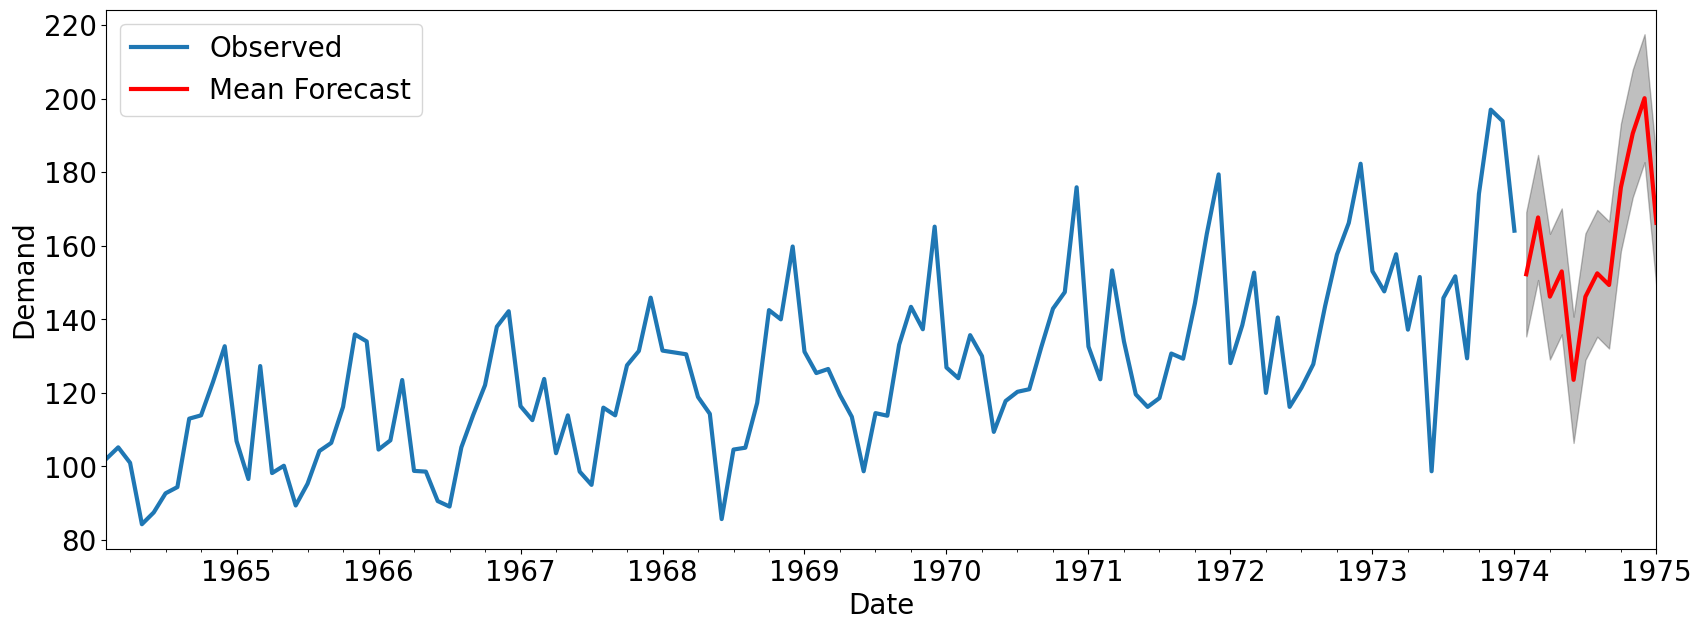

In [70]:
ax = dataframe['Demand'].plot(label='Observed', linewidth = 3, figsize=(20, 7))
forcast_uc.predicted_mean.plot(ax=ax, label='Mean Forecast', linewidth = 3,color = 'r')
ax.fill_between(forcast_ci.index,
                forcast_ci.iloc[:, 0],
                forcast_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Demand', fontsize=20)

ax.tick_params(axis='both', which='major', labelsize=20)
plt.legend(loc = 'upper left', fontsize=20)
plt.savefig('forecast2.png',  dpi = 300)
plt.show()

In [71]:
md = forcast_uc.predicted_mean.tolist()
md

[152.252558872392,
 167.69676497438675,
 146.17063855409074,
 153.0337401457327,
 123.55461523554531,
 146.15487480380935,
 152.50968713624425,
 149.34026620502058,
 175.87821768040914,
 190.5317343975912,
 200.11770852301694,
 166.22579622939668]

In [72]:
forcast_ci['Mean'] = md
forcast_ci

,lower Demand,upper Demand,Mean
1974-02-01,135.349742,169.155376,152.252559
1974-03-01,150.690508,184.703022,167.696765
1974-04-01,129.077104,163.264173,146.170639
1974-05-01,135.908876,170.158604,153.033740
1974-06-01,106.389991,140.719239,123.554615
1974-07-01,128.952284,163.357465,146.154875
1974-08-01,135.268891,169.750483,152.509687
1974-09-01,132.061411,166.619121,149.340266
1974-10-01,158.561375,193.195060,175.878218
1974-11-01,173.176990,207.886479,190.531734


In [73]:
std = (forcast_ci['upper Demand'] - forcast_ci['lower Demand'])/4
std

1974-02-01    8.451408
1974-03-01    8.503129
1974-04-01    8.546767
1974-05-01    8.562432
1974-06-01    8.582312
1974-07-01    8.601295
1974-08-01    8.620398
1974-09-01    8.639428
1974-10-01    8.658421
1974-11-01    8.677372
1974-12-01    8.696282
1975-01-01    8.715151
Freq: MS, dtype: float64

In [74]:
forcast_ci['Standerd Deviation'] = std
forcast_ci

,lower Demand,upper Demand,Mean,Standerd Deviation
1974-02-01,135.349742,169.155376,152.252559,8.451408
1974-03-01,150.690508,184.703022,167.696765,8.503129
1974-04-01,129.077104,163.264173,146.170639,8.546767
1974-05-01,135.908876,170.158604,153.033740,8.562432
1974-06-01,106.389991,140.719239,123.554615,8.582312
1974-07-01,128.952284,163.357465,146.154875,8.601295
1974-08-01,135.268891,169.750483,152.509687,8.620398
1974-09-01,132.061411,166.619121,149.340266,8.639428
1974-10-01,158.561375,193.195060,175.878218,8.658421
1974-11-01,173.176990,207.886479,190.531734,8.677372


In [75]:
import statistics as st

In [77]:
lead_data = pd.read_csv('lead_time.csv', header=0)

In [78]:
lead_data_list = lead_data['lead_time'].tolist()

In [79]:
mean_L = st.mean(lead_data_list)
mean_L

3.019230769230769

In [80]:
stnd_L = st.stdev(lead_data_list)
stnd_L

1.3059499527296943

In [81]:
mean_D = forcast_ci['Mean']
mean_D

1974-02-01    152.252559
1974-03-01    167.696765
1974-04-01    146.170639
1974-05-01    153.033740
1974-06-01    123.554615
1974-07-01    146.154875
1974-08-01    152.509687
1974-09-01    149.340266
1974-10-01    175.878218
1974-11-01    190.531734
1974-12-01    200.117709
1975-01-01    166.225796
Freq: MS, Name: Mean, dtype: float64

In [82]:
stnd_D = forcast_ci['Standerd Deviation']
stnd_D

1974-02-01    8.451408
1974-03-01    8.503129
1974-04-01    8.546767
1974-05-01    8.562432
1974-06-01    8.582312
1974-07-01    8.601295
1974-08-01    8.620398
1974-09-01    8.639428
1974-10-01    8.658421
1974-11-01    8.677372
1974-12-01    8.696282
1975-01-01    8.715151
Freq: MS, Name: Standerd Deviation, dtype: float64

In [83]:
c0 = 1000
ch = 40

In [84]:
EOQ = []

In [85]:
from math import *

In [86]:
for i in mean_D:
    EOQ.append(round(sqrt((2*i*c0)/ch)))
EOQ    


[87, 92, 85, 87, 79, 85, 87, 86, 94, 98, 100, 91]

In [87]:
rng = pd.date_range('1974-02-01', periods=12, freq='MS').strftime("%Y-%b").tolist()
rng

['1974-Feb',
 '1974-Mar',
 '1974-Apr',
 '1974-May',
 '1974-Jun',
 '1974-Jul',
 '1974-Aug',
 '1974-Sep',
 '1974-Oct',
 '1974-Nov',
 '1974-Dec',
 '1975-Jan']

In [88]:
EOQ_df = {'Date':rng,
          'EOQ':EOQ}

In [89]:
EOQ_df = pd.DataFrame(EOQ_df)

In [90]:
EOQ_df

,Date,EOQ
0,1974-Feb,87
1,1974-Mar,92
2,1974-Apr,85
3,1974-May,87
4,1974-Jun,79
5,1974-Jul,85
6,1974-Aug,87
7,1974-Sep,86
8,1974-Oct,94
9,1974-Nov,98


In [91]:
EOQ_df.index = EOQ_df['Date'] 

In [92]:
EOQ_df

,Date,EOQ
Date,,
1974-Feb,1974-Feb,87
1974-Mar,1974-Mar,92
1974-Apr,1974-Apr,85
1974-May,1974-May,87
1974-Jun,1974-Jun,79
1974-Jul,1974-Jul,85
1974-Aug,1974-Aug,87
1974-Sep,1974-Sep,86
1974-Oct,1974-Oct,94


In [93]:
EOQ_df.drop('Date',
  axis='columns', inplace=True)

In [94]:
EOQ_df

,EOQ
Date,
1974-Feb,87
1974-Mar,92
1974-Apr,85
1974-May,87
1974-Jun,79
1974-Jul,85
1974-Aug,87
1974-Sep,86
1974-Oct,94


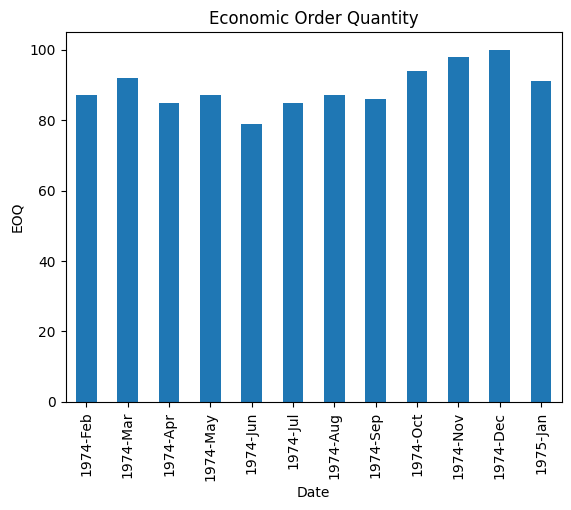

In [95]:
EOQ_df['EOQ'].plot(kind='bar')
plt.title('Economic Order Quantity')
plt.xlabel('Date')
plt.ylabel('EOQ')
plt.show()

In [96]:
alpha_list = np.linspace(0.90, 0.99, 10)
alpha_list

array([0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [97]:
stnd_D[1]

8.503128546899177

In [98]:
stnd_combined = []

In [99]:
for i in range(0,12):
    stnd_combined.append(sqrt((mean_L*(stnd_D[i]**2))+(((mean_D[i]/30)**2)*(stnd_L**2))))
                     

In [100]:
stnd_combined

[16.11149668077216,
 16.480041708399618,
 16.15657331512598,
 16.30139242677389,
 15.852866487786015,
 16.243437635885357,
 16.384113550349497,
 16.35903122287529,
 16.880905441359157,
 17.20847265550852,
 17.441897369557942,
 16.783418982603756]

In [101]:
k = []

In [102]:
from scipy.stats import norm


In [103]:
for i in alpha_list:
    k.append(norm.ppf(i))

In [104]:
k

[1.2815515655446004,
 1.3407550336902165,
 1.4050715603096329,
 1.475791028179171,
 1.554773594596854,
 1.6448536269514722,
 1.7506860712521692,
 1.8807936081512509,
 2.0537489106318225,
 2.3263478740408408]

In [105]:
SS = [[]]
c = []
rop = []
m = 0

In [106]:
mean_L

3.019230769230769

In [107]:
mean_d = mean_D.tolist()
mean_d

[152.252558872392,
 167.69676497438675,
 146.17063855409074,
 153.0337401457327,
 123.55461523554531,
 146.15487480380935,
 152.50968713624425,
 149.34026620502058,
 175.87821768040914,
 190.5317343975912,
 200.11770852301694,
 166.22579622939668]

In [108]:
for i in k:
    for j in stnd_combined:
        x = i*j
        c.append(round(x))

        

In [109]:
len(c)

120

In [110]:
d = []
for i in mean_d:
    d.append(mean_L*(i/30))

In [111]:
d

[15.32285368138817,
 16.877174423704307,
 14.710762982687337,
 15.401472565948739,
 12.434663199987572,
 14.709176502691069,
 15.348731333583554,
 15.029757560377071,
 17.700564215271942,
 19.175309166937062,
 20.140051434688242,
 16.729134620522615]

In [112]:
for i in d:
    for j in range(0,10):
        rop.append(round((i+c[j])))
        

In [113]:
rop

[36,
 36,
 36,
 36,
 35,
 36,
 36,
 36,
 37,
 37,
 38,
 38,
 38,
 38,
 37,
 38,
 38,
 38,
 39,
 39,
 36,
 36,
 36,
 36,
 35,
 36,
 36,
 36,
 37,
 37,
 36,
 36,
 36,
 36,
 35,
 36,
 36,
 36,
 37,
 37,
 33,
 33,
 33,
 33,
 32,
 33,
 33,
 33,
 34,
 34,
 36,
 36,
 36,
 36,
 35,
 36,
 36,
 36,
 37,
 37,
 36,
 36,
 36,
 36,
 35,
 36,
 36,
 36,
 37,
 37,
 36,
 36,
 36,
 36,
 35,
 36,
 36,
 36,
 37,
 37,
 39,
 39,
 39,
 39,
 38,
 39,
 39,
 39,
 40,
 40,
 40,
 40,
 40,
 40,
 39,
 40,
 40,
 40,
 41,
 41,
 41,
 41,
 41,
 41,
 40,
 41,
 41,
 41,
 42,
 42,
 38,
 38,
 38,
 38,
 37,
 38,
 38,
 38,
 39,
 39]

In [114]:
c

[21,
 21,
 21,
 21,
 20,
 21,
 21,
 21,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 21,
 22,
 22,
 22,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 22,
 23,
 23,
 23,
 24,
 24,
 25,
 24,
 24,
 24,
 24,
 24,
 23,
 24,
 24,
 24,
 25,
 25,
 26,
 25,
 25,
 26,
 25,
 25,
 25,
 25,
 25,
 25,
 26,
 27,
 27,
 26,
 27,
 27,
 27,
 27,
 26,
 27,
 27,
 27,
 28,
 28,
 29,
 28,
 28,
 29,
 28,
 29,
 28,
 28,
 29,
 29,
 30,
 30,
 31,
 29,
 30,
 31,
 30,
 31,
 30,
 31,
 31,
 31,
 32,
 32,
 33,
 32,
 33,
 34,
 33,
 33,
 33,
 33,
 34,
 34,
 35,
 35,
 36,
 34,
 37,
 38,
 38,
 38,
 37,
 38,
 38,
 38,
 39,
 40,
 41,
 39]

In [115]:
rop

[36,
 36,
 36,
 36,
 35,
 36,
 36,
 36,
 37,
 37,
 38,
 38,
 38,
 38,
 37,
 38,
 38,
 38,
 39,
 39,
 36,
 36,
 36,
 36,
 35,
 36,
 36,
 36,
 37,
 37,
 36,
 36,
 36,
 36,
 35,
 36,
 36,
 36,
 37,
 37,
 33,
 33,
 33,
 33,
 32,
 33,
 33,
 33,
 34,
 34,
 36,
 36,
 36,
 36,
 35,
 36,
 36,
 36,
 37,
 37,
 36,
 36,
 36,
 36,
 35,
 36,
 36,
 36,
 37,
 37,
 36,
 36,
 36,
 36,
 35,
 36,
 36,
 36,
 37,
 37,
 39,
 39,
 39,
 39,
 38,
 39,
 39,
 39,
 40,
 40,
 40,
 40,
 40,
 40,
 39,
 40,
 40,
 40,
 41,
 41,
 41,
 41,
 41,
 41,
 40,
 41,
 41,
 41,
 42,
 42,
 38,
 38,
 38,
 38,
 37,
 38,
 38,
 38,
 39,
 39]

In [120]:
q = 0

In [121]:
c[q:q+10]

[21, 21, 21, 21, 20, 21, 21, 21, 22, 22]

In [122]:
SS = [[]]*len(stnd_combined)

In [123]:
ROP = [[]]*len(stnd_combined)

In [124]:
for i in range(0,12):
    SS[i] = c[q:q+10]
    q+=10

In [125]:
q = 0
sum_list = []


In [126]:
for (item1, item2) in zip(c, rop):
    sum_list.append(item1+item2)



In [127]:
sum_list

[57,
 57,
 57,
 57,
 55,
 57,
 57,
 57,
 59,
 59,
 60,
 60,
 60,
 60,
 59,
 60,
 59,
 60,
 61,
 61,
 59,
 59,
 59,
 59,
 58,
 59,
 59,
 59,
 59,
 60,
 59,
 59,
 60,
 60,
 60,
 60,
 60,
 60,
 61,
 61,
 56,
 57,
 57,
 57,
 57,
 58,
 59,
 58,
 59,
 60,
 61,
 61,
 61,
 61,
 60,
 61,
 62,
 63,
 64,
 63,
 63,
 63,
 63,
 63,
 61,
 63,
 63,
 63,
 65,
 65,
 65,
 64,
 64,
 65,
 63,
 65,
 64,
 64,
 66,
 66,
 69,
 69,
 70,
 68,
 68,
 70,
 69,
 70,
 70,
 71,
 71,
 71,
 72,
 72,
 72,
 72,
 73,
 74,
 74,
 74,
 74,
 74,
 75,
 75,
 75,
 76,
 77,
 75,
 79,
 80,
 76,
 76,
 75,
 76,
 75,
 76,
 77,
 78,
 80,
 78]

In [128]:
for i in range(0,12):
    ROP[i] = sum_list[q:q+10]
    q+=10

In [129]:
ROP

[[57, 57, 57, 57, 55, 57, 57, 57, 59, 59],
 [60, 60, 60, 60, 59, 60, 59, 60, 61, 61],
 [59, 59, 59, 59, 58, 59, 59, 59, 59, 60],
 [59, 59, 60, 60, 60, 60, 60, 60, 61, 61],
 [56, 57, 57, 57, 57, 58, 59, 58, 59, 60],
 [61, 61, 61, 61, 60, 61, 62, 63, 64, 63],
 [63, 63, 63, 63, 61, 63, 63, 63, 65, 65],
 [65, 64, 64, 65, 63, 65, 64, 64, 66, 66],
 [69, 69, 70, 68, 68, 70, 69, 70, 70, 71],
 [71, 71, 72, 72, 72, 72, 73, 74, 74, 74],
 [74, 74, 75, 75, 75, 76, 77, 75, 79, 80],
 [76, 76, 75, 76, 75, 76, 77, 78, 80, 78]]

In [130]:
SS_df = pd.DataFrame(SS)
ROP_df = pd.DataFrame(ROP)

In [131]:
SS_df.columns = [x for x in alpha_list]


In [132]:
ROP_df.columns = [x for x in alpha_list]


In [133]:
SS_df

,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,21,21,21,21,20,21,21,21,22,22
1,22,22,22,22,22,22,21,22,22,22
2,23,23,23,23,23,23,23,23,22,23
3,23,23,24,24,25,24,24,24,24,24
4,23,24,24,24,25,25,26,25,25,26
5,25,25,25,25,25,25,26,27,27,26
6,27,27,27,27,26,27,27,27,28,28
7,29,28,28,29,28,29,28,28,29,29
8,30,30,31,29,30,31,30,31,30,31
9,31,31,32,32,33,32,33,34,33,33


In [134]:
ROP_df

,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,57,57,57,57,55,57,57,57,59,59
1,60,60,60,60,59,60,59,60,61,61
2,59,59,59,59,58,59,59,59,59,60
3,59,59,60,60,60,60,60,60,61,61
4,56,57,57,57,57,58,59,58,59,60
5,61,61,61,61,60,61,62,63,64,63
6,63,63,63,63,61,63,63,63,65,65
7,65,64,64,65,63,65,64,64,66,66
8,69,69,70,68,68,70,69,70,70,71
9,71,71,72,72,72,72,73,74,74,74


In [135]:
SS_df.index = rng
SS_df

,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
1974-Feb,21,21,21,21,20,21,21,21,22,22
1974-Mar,22,22,22,22,22,22,21,22,22,22
1974-Apr,23,23,23,23,23,23,23,23,22,23
1974-May,23,23,24,24,25,24,24,24,24,24
1974-Jun,23,24,24,24,25,25,26,25,25,26
1974-Jul,25,25,25,25,25,25,26,27,27,26
1974-Aug,27,27,27,27,26,27,27,27,28,28
1974-Sep,29,28,28,29,28,29,28,28,29,29
1974-Oct,30,30,31,29,30,31,30,31,30,31
1974-Nov,31,31,32,32,33,32,33,34,33,33


In [136]:
SS_90 = SS_df[0.90]
SS_90 = pd.DataFrame(SS_90)


In [137]:
SS_90

,0.9
1974-Feb,21
1974-Mar,22
1974-Apr,23
1974-May,23
1974-Jun,23
1974-Jul,25
1974-Aug,27
1974-Sep,29
1974-Oct,30
1974-Nov,31
